# BFS

# Q) [Snakes and Ladders: The Quickest Way Up](https://www.hackerrank.com/challenges/the-quickest-way-up)

In [1]:

def quickestWayUp(ladders, snakes):
    
    # Build directed graph
    paths = {}
    for s, d in ladders + snakes:
        paths[s] = d
    
    visited = set()
    queue = [(1, 0)]
    while queue:
        # print("queue: ", queue)
        sq, rolls = queue.pop(0)
        if 100 == sq:
            return rolls

        visited.add(sq)
        for i in reversed(range(1, 7)):
            next_sq = sq + i
            if next_sq in visited or next_sq > 100:
                continue

            queue.append(((next_sq in paths and paths[next_sq]) or next_sq, rolls + 1))

    return -1

# ladders = [[32, 62], [42, 68], [12, 98]]
# snakes = [[95, 13], [97, 25], [93, 37], [79, 27], [75, 19], [49, 47], [67, 17]]
ladders = [[8, 52], [6, 80], [26, 42], [2, 72]]
snakes = [[51, 19], [39, 11], [37, 29], [81, 3], [59, 5], [79, 23], [53, 7], [43, 33], [77, 21]]
result = quickestWayUp(ladders, snakes)
print("result: ", result)

result:  5


# Q) [Breadth First Search: Shortest Reach](https://www.hackerrank.com/challenges/bfsshortreach/problem)

In [2]:
def bfs(n, m, edges, s):

    # Build undirected graph
    graph = {}
    for num in range(1, n+1):
        graph[num] = set()
    for l, r in edges:
        graph[l].add(r)
        graph[r].add(l)
    
    visited = {s}
    queue = [(s, 0)]
    cost_from_s = {}
    while queue:
        curr_node, curr_cost = queue.pop(0)
        for nbour in graph[curr_node]:
            if nbour not in visited:
                visited.add(nbour)
                queue.append((nbour, curr_cost + 6))
                cost_from_s[nbour] = curr_cost + 6

    result = []
    for node in range(1, n+1):
        if s != node:
            result.append(cost_from_s.get(node, -1))
    
    return result

n = 4
m = 2
edges = [[1, 2], [1, 3]]
s = 1
print(bfs(n, m, edges, s))

n = 3
m = 1
edges = [[2, 3]]
s = 2
print(bfs(n, m, edges, s))

[6, 6, -1]
[-1, 6]


## Q) Shortest Word Edit Path

In [3]:
"""
Time Complexity:
O(N*K^2), where N is the length of words and K is the maximum length of any given word.
For each word in words, in order to find neighbors we may construct O(K) new words, each in O(K) time.

Space Complexity:
O(NK), the space to store the word list.
"""

def shortestWordEditPath(source, target, wordset):

    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    visited = set()
    visited.add(source)
    queue = []
    queue.append((source, 0))

    while queue:
        word, depth = queue.pop(0)
        if word == target:
            return depth
        for i in range(len(word)):
            # First Strategy
#             for word2 in wordset:
#                 if len(word2) == len(word):
#                     diff = 0
#                     for j in range(len(word)):
#                         if word[j] != word2[j]:
#                             diff += 1
#                             if diff == 2:
#                                 break
#                     if diff == 1 and word2 not in visited:
#                         queue.append((word2, depth+1))
#                         visited.add(word2)

            # Second Strategy
            for c in alphabet:
                word2 = list(word)
                word2[i] = c
                word2 = ''.join(word2)
                if word2 in wordset and word2 not in visited:
                    queue.append((word2, depth+1))
                    visited.add(word2)
    return -1

words = ["but", "put", "big", "pot", "pog", "dog", "lot"]

source = 'bit'
target = "dog"

print(shortestWordEditPath(source, target, words))

5


In [4]:
# Recurssion
# Time complexity: O(N^2); Space: O(N)

def is_valid(word1, word2):
    if len(word1) == len(word2):
        toggle = False
        for a, b in zip(word1, word2):
            if a != b:
                if toggle:
                    return False
                toggle = True
        return True
    return False
    
def shortestWordEditPath(source, target, words):
    global rez
    rez = float('inf')

    def calc(current_word, visited, edits):
        global rez
        if current_word == target:
            rez = min(rez, edits)
        else:   
            for word in words:
                if word not in visited and is_valid(current_word, word):
                    new_visited = set(visited)
                    new_visited.add(word)
                    calc(word, new_visited, edits + 1)
  
    calc(source, {source}, 0)
    
    if rez == float('inf'):
        return -1
    
    return rez

words = ["but", "put", "big", "pot", "pog", "dog", "lot"]
source = 'bit'
target = "pot"#"dog"

print(shortestWordEditPath(source, target, words))

3


## Q) Sales Path

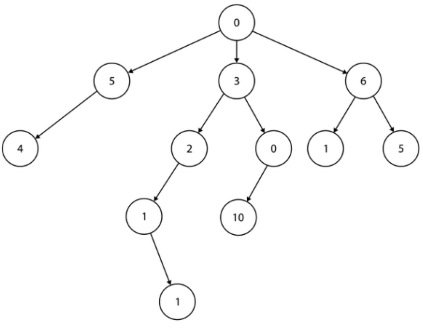

In [5]:
class Tree(object):
    "Generic tree node."
    def __init__(self, cost, children=None):
        self.cost = cost
        self.children = []
        self.parent = None
        
        if children is not None:
            for child in children:
                self.add_child(child)
    
    def add_child(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)

t = Tree(0, [Tree(5,
                  [Tree(4)]),
             Tree(3,
                  [Tree(2,
                       [Tree(1,
                             [Tree(1)])]),
                   Tree(0,
                        [Tree(10)])]),
             Tree(6,
                  [Tree(1),
                   Tree(5)])])

"""
GT:
- No need to use visited as it is a Tree and there is no way to visit a node again
- Use `while queue` instead of `while True`
"""
def get_cheapest_cost(rootNode):
  
    queue = [(rootNode, rootNode.cost)]
    path_cost = []
  
    while queue:    
        node, cost = queue.pop(0)
        #print("node: ", node.cost)
    
        if len(node.children) == 0:
            path_cost.append(cost)
      
        for child in node.children:
            queue.append((child, cost+child.cost))
    
    return min(path_cost)

print("Cheapest Cost: ", get_cheapest_cost(t))

Cheapest Cost:  7


In [6]:
# Recurssion
"""
Time Complexity:
let N be the number of nodes in the tree. Notice that getCheapestCost is applied to every node exactly once.
Therefore, there are overall O(N) calls to getCheapestCost.

Space Complexity:
every time the function recurses, it consumes only a constant amount of space.
However, due to the nature of the recursion we used, the stack call holds N instances of
getCheapestCost which makes the total space complexity to be O(N).
"""
def getCheapestCost(rootNode):
    print("rootNode.cost: ", rootNode.cost)
    
    n = len(rootNode.children)
    
    # Base case
    if (n == 0):
        return rootNode.cost
    else:
        # Recurssion
        # initialize minCost to the largest integer in the system
        minCost = float('inf')
        for i in range(n):
            tempCost = getCheapestCost(rootNode.children[i])
            print("tempCost ", tempCost)
            if (tempCost < minCost):
                minCost = tempCost

    return minCost + rootNode.cost

print("Cheapest Cost: ", getCheapestCost(t))

rootNode.cost:  0
rootNode.cost:  5
rootNode.cost:  4
tempCost  4
tempCost  9
rootNode.cost:  3
rootNode.cost:  2
rootNode.cost:  1
rootNode.cost:  1
tempCost  1
tempCost  2
tempCost  4
rootNode.cost:  0
rootNode.cost:  10
tempCost  10
tempCost  10
tempCost  7
rootNode.cost:  6
rootNode.cost:  1
tempCost  1
rootNode.cost:  5
tempCost  5
tempCost  7
Cheapest Cost:  7


# Q) Autonomous Vehicle Navigation

In [7]:
import numpy as np

def get_shortest_path_length(grid):
    original_loc = (0, 0)
    final_loc = (grid.shape[0] - 1, grid.shape[1] - 1)

    queue = [(original_loc, 0)]
    visited = {original_loc}  # use a set data structure

    while queue:
        loc, length = queue.pop(0)

        if loc == final_loc:
            return length
        
        # Making sure not to go outside the grid
        loc_right = (loc[0], loc[1] + 1) if loc[1] + 1 <= final_loc[1] else loc
        loc_down = (loc[0] + 1, loc[1]) if loc[0] + 1 <= final_loc[0] else loc

        for loc in [loc_right, loc_down]:
            if grid[loc[0]][loc[1]] == 1:
                # Avoiding obstacles
                continue
            if loc not in visited:
                visited.add(loc)
                queue.append((loc, length + 1))

    return -1

'''
Time: O(V+E)
'''

m, n = 5, 5
grid = np.random.randint(2, size=(m, n))
grid[0][0] = 0
grid[m-1][n-1] = 0

grid = [[0, 0, 0, 1, 1],
 [0, 1, 0, 0, 1],
 [0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0]]
grid = np.array(grid)

print('grid: \n', grid)

length = get_shortest_path_length(grid)
print('length: ', length)

grid: 
 [[0 0 0 1 1]
 [0 1 0 0 1]
 [0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 1 0 0]]
length:  8


# Q) Find the Optimal Path for an Autonomous Vehicle

In [8]:
import numpy as np

def get_coordinates_of_optimal_path(grid, start_loc, target_loc, m, n):
    # Define possible directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    queue = [[start_loc, [start_loc]]]  # node, path
    visited = [start_loc]

    while queue:
        loc, path_list = queue.pop(0)

        if path_list[-1] == target_loc:
            return path_list

        for dx, dy in directions:
            new_loc = [loc[0] + dx, loc[1] + dy]

            # Check if new_loc is within bounds
            if 0 <= new_loc[0] < m and 0 <= new_loc[1] < n:
                if grid[new_loc[0]][new_loc[1]] != '1' and new_loc not in visited:
                    visited.append(new_loc)
                    path_list_copy = path_list.copy() # IMPORTANT to copy
                    path_list_copy.append(new_loc)
                    queue.append([new_loc, path_list_copy])

    return []

m, n = 5, 5
grid = np.random.randint(2, size=(m, n))
grid = grid.astype(str)  # Convert to string

r = np.random.randint(m, size=1)[0]
c = np.random.randint(n, size=1)[0]
grid[r][c] = 'S'

while True:
    r = np.random.randint(m, size=1)[0]
    c = np.random.randint(n, size=1)[0]
    if grid[r][c] != 'S':
        grid[r][c] = 'D'
        break

grid = [
    ['S', '0', '0', '0', '1'],
    ['0', '1', '1', '0', '1'],
    ['0', '1', '0', '0', '0'],
    ['1', '0', '0', '1', '0'],
    ['0', '1', '1', 'D', '0'],
]
grid = np.array(grid)
print('grid: \n', grid)

m, n = grid.shape

start_loc = list(np.argwhere(grid == 'S')[0])
target_loc = list(np.argwhere(grid == 'D')[0])
print('start_loc, target_loc: ', start_loc, target_loc)

optimal_path = get_coordinates_of_optimal_path(grid, start_loc, target_loc, m, n)
print('optimal_path: ', optimal_path)


grid: 
 [['S' '0' '0' '0' '1']
 ['0' '1' '1' '0' '1']
 ['0' '1' '0' '0' '0']
 ['1' '0' '0' '1' '0']
 ['0' '1' '1' 'D' '0']]
start_loc, target_loc:  [0, 0] [4, 3]
optimal_path:  [[0, 0], [0, 1], [0, 2], [0, 3], [1, 3], [2, 3], [2, 4], [3, 4], [4, 4], [4, 3]]
